In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
df.drop(['sex'], axis='columns', inplace=True)

In [4]:
df.fillna({'culmen_length_mm': df.culmen_length_mm.mean(),
           'culmen_depth_mm': df.culmen_depth_mm.mean(),
           'flipper_length_mm': df.flipper_length_mm.mean(),
           'body_mass_g': df.body_mass_g.mean()
          }, inplace=True)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000
...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000


In [5]:
df1 = pd.get_dummies(df['species'])
df2 = pd.get_dummies(df['island'])
df.drop(['species', 'island'], axis='columns', inplace=True)
final = pd.concat([df, df1, df2], axis='columns')
final

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen
0,39.10000,18.70000,181.000000,3750.000000,1,0,0,0,0,1
1,39.50000,17.40000,186.000000,3800.000000,1,0,0,0,0,1
2,40.30000,18.00000,195.000000,3250.000000,1,0,0,0,0,1
3,43.92193,17.15117,200.915205,4201.754386,1,0,0,0,0,1
4,36.70000,19.30000,193.000000,3450.000000,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,0,0,1,1,0,0
340,46.80000,14.30000,215.000000,4850.000000,0,0,1,1,0,0
341,50.40000,15.70000,222.000000,5750.000000,0,0,1,1,0,0
342,45.20000,14.80000,212.000000,5200.000000,0,0,1,1,0,0


**Elbow Plot**

In [6]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['culmen_length_mm','culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])
    sse.append(km.inertia_)

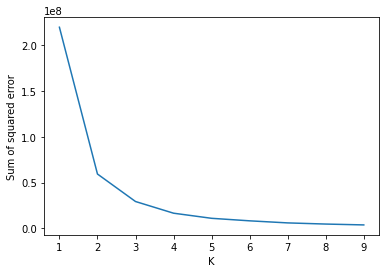

In [7]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

**• Pre-processing using min max scaler:**

In [8]:
scaler = MinMaxScaler()
df['culmen_length_mm'] = scaler.fit_transform(df[['culmen_length_mm']])
df['culmen_depth_mm'] = scaler.fit_transform(df[['culmen_depth_mm']])
df['flipper_length_mm'] = scaler.fit_transform(df[['flipper_length_mm']])
df['body_mass_g'] = scaler.fit_transform(df[['body_mass_g']])

**Clustering**

In [9]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
yp

array([2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
df['cluster'] = yp
df.head(2)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster
0,0.254545,0.666667,0.152542,0.291667,2
1,0.269091,0.511905,0.237288,0.305556,2


In [11]:
df.cluster.unique()

array([2, 0, 1])

In [12]:
df_1 = df[df.cluster==0]
df_2 = df[df.cluster==1]
df_3 = df[df.cluster==2]

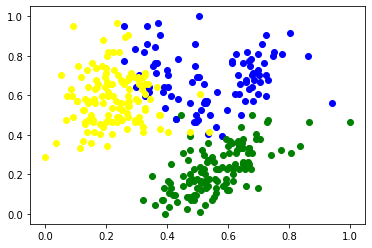

In [15]:
plt.scatter(df_1['culmen_length_mm'],df_1['culmen_depth_mm'], color='blue')
plt.scatter(df_2['culmen_length_mm'],df_2['culmen_depth_mm'],color='green')
plt.scatter(df_3['culmen_length_mm'],df_3['culmen_depth_mm'],color='yellow')